# Wine Dataset

## Dataset Description

### This dataset consists of 178 records and 13 numerical features.

### Variables

#### Alcohol - Alcohol content in the wine.
#### Malic_Acid - Amount of malic acid.
#### Ash - Ash content in the wine.
#### Ash_Alcanity - Alkalinity of ash.
#### Magnesium - Magnesium content in the wine.
#### Total_Phenols - Total phenolic compounds present.
#### Flavanoids - Amount of flavonoid compounds.
#### Nonflavanoid_Phenols - Non-flavonoid phenolic compounds.
#### Proanthocyanins - A type of phenolic compound.
#### Color_Intensity - Intensity of the wine’s color.
#### Hue - Hue of the wine color.
#### OD280 - Optical density at 280nm, related to total polyphenol content.
#### Proline - Amount of proline, an amino acid.

### Importing all necessary libraries

In [705]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [706]:
df = pd.read_csv("Lab8.csv")
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [708]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Checking for any duplicate rows

In [710]:
print("Rows and Column in Dataset are : " , df.shape)

Rows and Column in Dataset are :  (178, 13)


In [711]:
duplicate = df[df.duplicated()]
print("Number of Duplicate rows : ", duplicate.shape)

Number of Duplicate rows :  (0, 13)


## Checking for NULL values in Dataset and handling them

In [713]:
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


## Plotting dataset

### Histogram

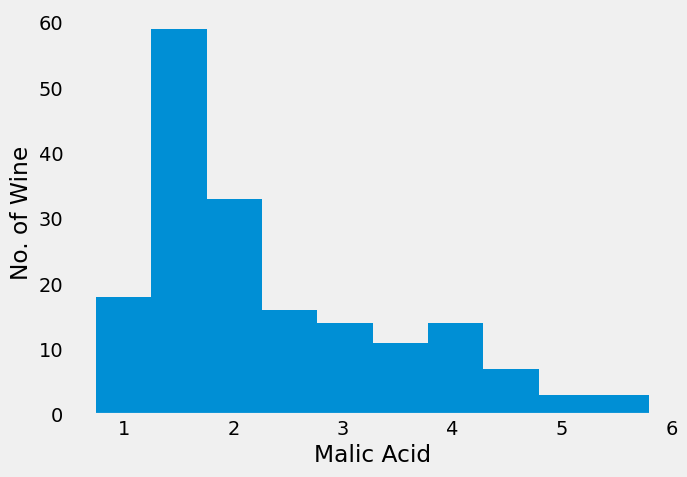

In [788]:
plt.figure(figsize=(7, 5))
df['Malic_Acid'].hist(grid=False)
plt.xlabel('Malic Acid')
plt.ylabel('No. of Wine')
plt.show()

### Interpretation: The average Malic acid in wine is between 1 to 2 while some wines have very high malic acid of** 5.5 and above.**

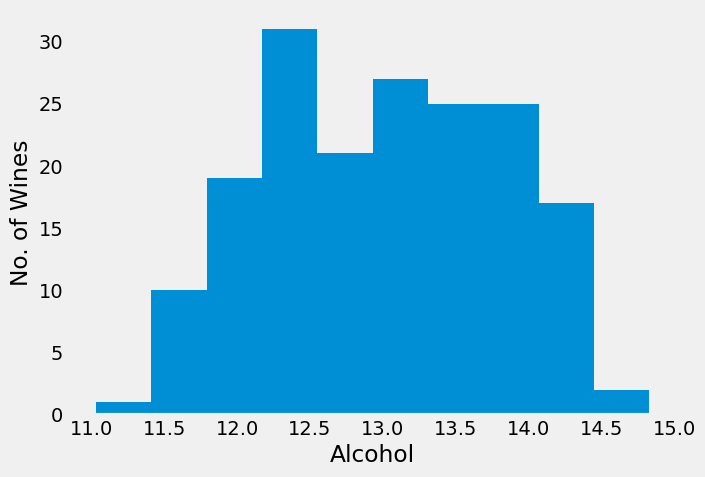

In [790]:
plt.figure(figsize=(7, 5))
df['Alcohol'].hist(grid=False)
plt.xlabel('Alcohol')
plt.ylabel('No. of Wines')
plt.show()

### Interpretation: The majority wines have Alcohol level between 12.0 to 14.0.

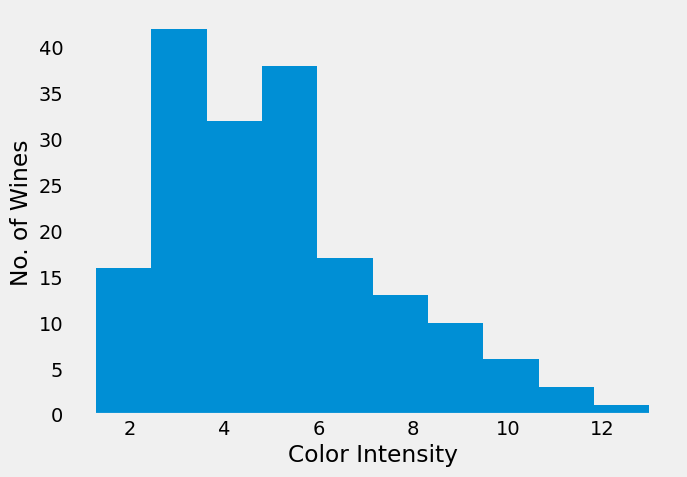

In [792]:
plt.figure(figsize=(7, 5))
df['Color_Intensity'].hist(grid=False)
plt.xlabel('Color Intensity')
plt.ylabel('No. of Wines')
plt.show()

### Interpretation : The majority wines have color Intensity of 2.2 to 6.

### Heatmap

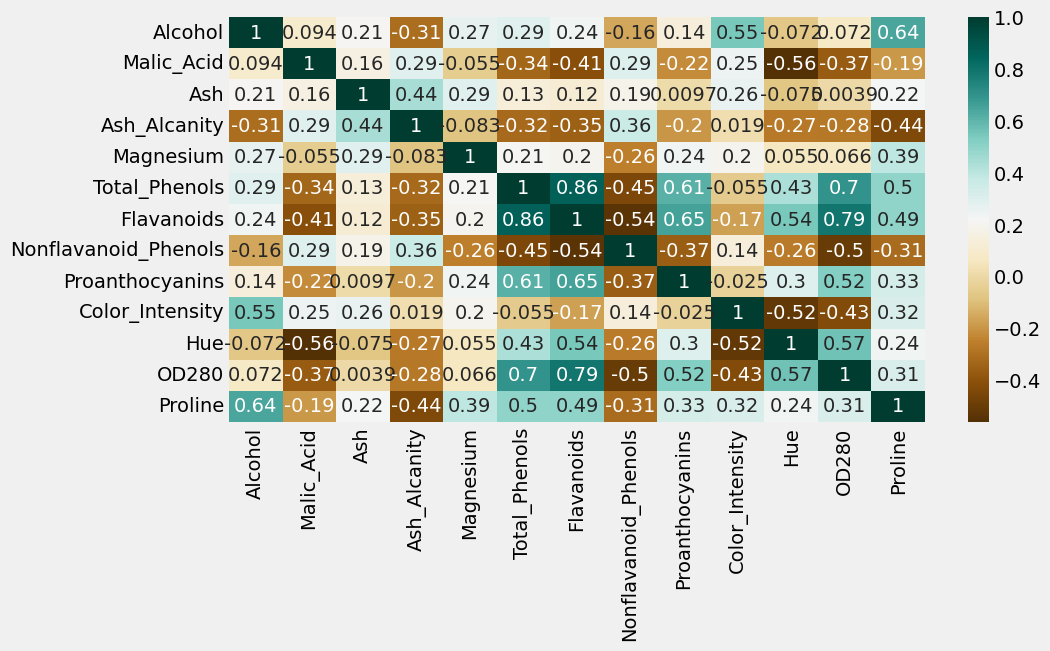

In [796]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

## Interpretation: 

#### Flavanoids and Total Phenols show a strong positive correlation (0.86), indicating that wines with more flavonoids tend to have higher total phenols.

#### Proline and Alcohol have a significant positive correlation (0.64), suggesting that wines with higher alcohol content also have higher proline levels.

#### Malic Acid and Hue have a strong negative correlation (-0.56), meaning wines with higher malic acid content tend to have lower hue values.

#### Flavanoids and Nonflavanoid Phenols show a strong negative correlation (-0.54), implying that an increase in flavanoids leads to a decrease in nonflavanoid phenols.

### Scatter Plot

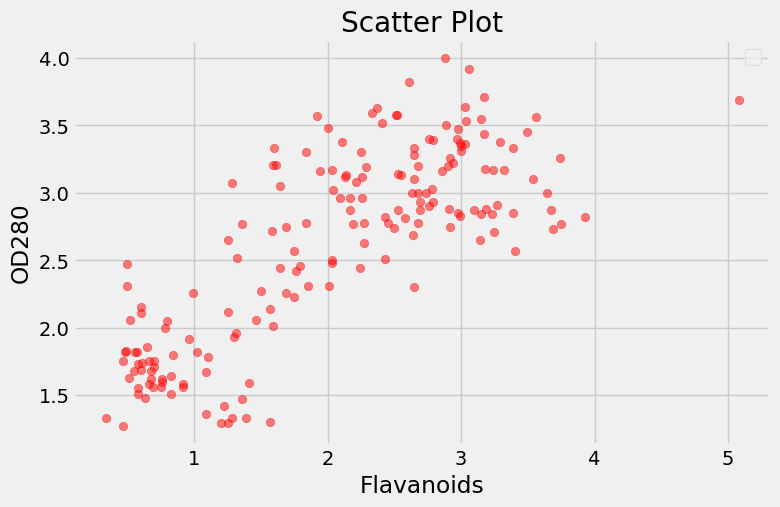

In [726]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Flavanoids'], df['OD280'], color='red', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation: This plot suggests a strong linear relationship between Flavanoids and OD280, meaning wines with higher flavonoid content tend to have higher OD280 absorbance values. This aligns with the heatmap correlation where these two features had a strong positive relationship.

## Using the Elbow Method to Find the Optimal Number of Clusters

In [729]:
X = df.iloc[:,[0, 1, 9]].values

In [730]:
print("Inertia (WCSS):", kmeans.inertia_)

Inertia (WCSS): 627.1515597722617


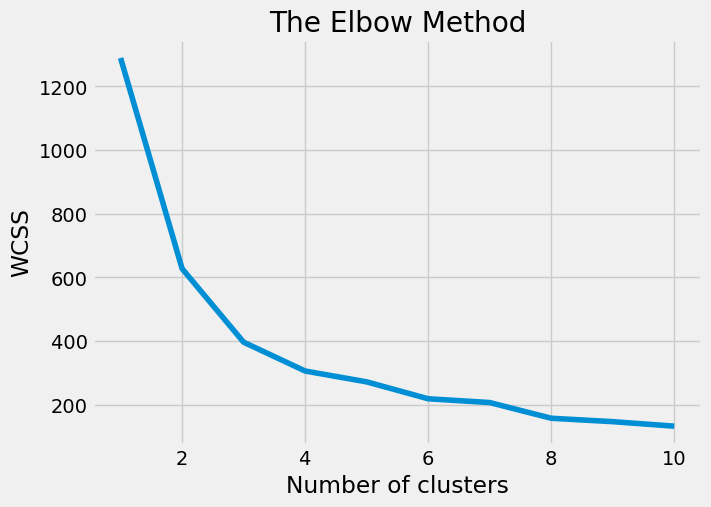

In [798]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Interpretation : The graph shows a sharp decline in WCSS as K increases, followed by a noticeable "elbow" or bend around K=3 or K=4, where the rate of decrease slows. <br><br>This point represents the optimal balance between minimizing clustering errors and avoiding excessive complexity.

## Based on this graph, the ideal number of clusters for this dataset is likely 3 or 4.

## Training the K-Means model on the dataset

In [735]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualizing the Clusters

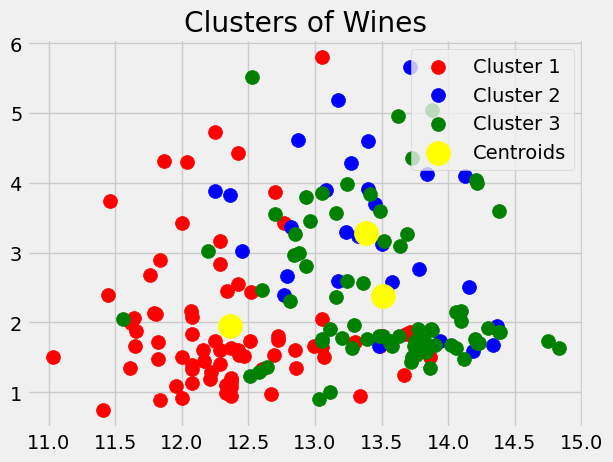

In [737]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Wines')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Interpretation:<br><br> The yellow dots represent the centroids of the clusters.

### Cluster 1 (Red):

### This cluster represents wines with lower alcohol content and moderate flavonoid levels. These wines generally have a lower OD280 absorbance compared to the other clusters.

### Cluster 2 (Blue):

### This cluster includes wines with moderate alcohol content and higher flavonoid levels. These wines exhibit better OD280 absorbance, indicating a higher concentration of polyphenols and quality compounds.

### Cluster 3 (Green):

### This cluster represents wines with higher alcohol content and high flavonoid levels. These wines tend to have higher OD280 absorbance, suggesting richer phenolic content and potentially better aging potential. <br><br>The wine industry can use these clusters to tailor their marketing and production strategies effectively.

### <br>For example: <br><br>Cluster 1 wines may benefit from targeted improvements in polyphenol composition to enhance quality. <br>Cluster 2 wines could be marketed as balanced, mid-range options for general consumers. <br>Cluster 3 wines may appeal to premium wine buyers looking for higher-quality, richer wines with aging potential.

## Results and Interpretation

In [747]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[12.36473684  1.94907895  3.04236842]
 [13.38642857  3.28392857  9.17107139]
 [13.5077027   2.37554054  5.57202703]]


### The cluster centers indicate the average alcohol content, flavonoid levels, and OD280 absorbance for different wine groups. <br><br>Cluster 1 has lower alcohol and flavonoid levels, representing lighter wines.<br><br> Cluster 2 features moderate alcohol with high flavonoid content, suggesting premium-quality wines. <br><br> Cluster 3 has higher alcohol and moderate flavonoid levels, offering a balanced wine profile.

## Using the Silhouette score to Find the Optimal Number of Clusters

In [750]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

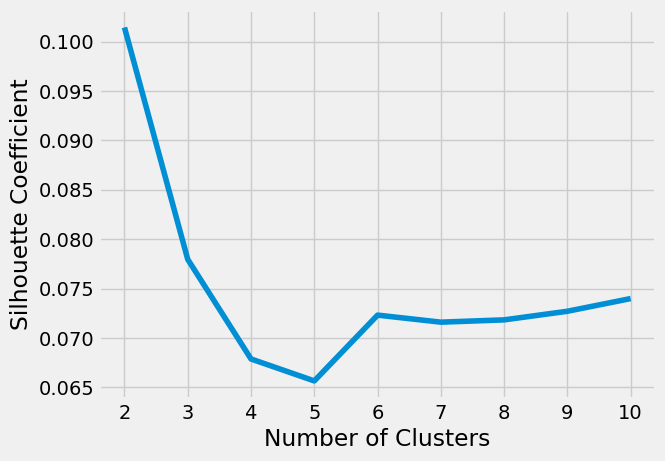

In [751]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Interpretation : The highest score is at 2 clusters, suggesting that two clusters provide the best separation. <br><br> As the number of clusters increases, the silhouette coefficient decreases, reaching a low around 4-5 clusters, indicating poorer clustering quality.<br><br> Beyond 6 clusters, the score slightly improves but remains lower than for 2 clusters, meaning additional clusters do not significantly improve separation.

## Training the K-Means model on the dataset

In [754]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualizing the Clusters

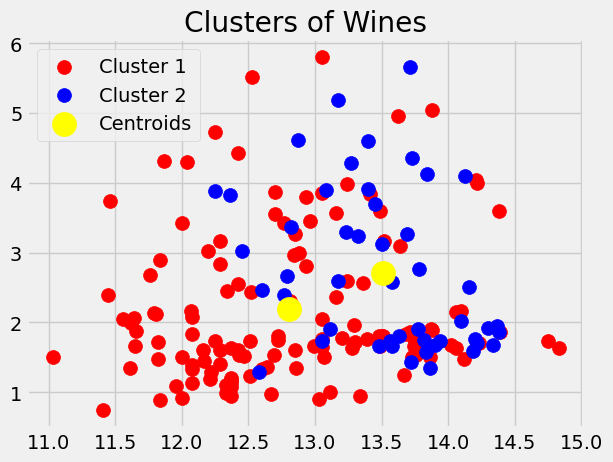

In [756]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Wines')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Interpretation : <br> Cluster 1 (Red): Wines in this cluster share similar characteristics and tend to be more concentrated in a particular range. <br><br> Cluster 2 (Blue): These wines exhibit different attributes compared to Cluster 1, forming a distinct group. <br><br> Centroids (Yellow): Represent the average position of wines within each cluster, serving as the center of mass for the groups.

## Result and Interpretation

In [784]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[12.80697674  2.19426357  3.89434109]
 [13.51040816  2.71040816  8.12183671]]


## Cluster 1 (Center: [12.81, 2.19, 3.89]): Wines in this cluster have lower values for the second and third features, indicating moderate characteristics.<br><br>Cluster 2 (Center: [13.51, 2.71, 8.12]): Wines in this cluster exhibit higher values, particularly in the third feature, suggesting a stronger presence of that attribute.